## Central Difference Approximation For First Order Derivative

In [1]:
import numpy as np
import matplotlib.pyplot as plt


Our function is  
$$ f(x) = \sin(x) + 0.5x^3$$
with first order derivave:
$$ f'(x) = \cos (x) + 1.5x^2 $$
With second order derivative:
$$f"(x) = -\sin(x) + 3x $$

In [2]:
def f(x):
    return np.sin(x) + 0.5 * x**3

def f_prime(x):
    return np.cos(x) + 1.5 * x**2

To approximate the second-order derivative using the central difference algorithm, we derive the following using taylor series.
$$ f(x + h)= f(x) + hf' + \frac{h^2}{2} f"(x) + \frac{h^3}{6} f'''(x) + \frac{h^4}{24}f^{(4)}(x) + O(h^5)$$
$$ f(x - h)= f(x) - hf' + \frac{h^2}{2} f"(x) - \frac{h^3}{6} f'''(x) + \frac{h^4}{24}f^{(4)}(x) - O(h^5)$$

we take their difference , to get; 
$$ f(x+h) -f(x-h) = 2h f'(x)$$

In [3]:

# derivative approximation using 1 point forward difference
def f_prime_numerical(x, h):
    return (f(x + h) - f(x)) / h


# derivative using central difference
def fp_central_diff(x, h):
    return (f(x+h) - f(x-h))/ (2*h)



Choosing three different step sizes

In [4]:
step_sizes = [0.2, 0.01, 0.05]

In [5]:
x_min, x_max = -2, 2
x_arrays = []
y_original_arrays = []
y_derivative_arrays = []
y_numerical_arrays = []
y_central_diff_arrays = []

for h in step_sizes:
    n_points = int((x_max - x_min) / h) + 1
    x = np.linspace(x_min, x_max, n_points)
    
    y_original = f(x)  
    y_derivative = f_prime(x)       
    y_numerical = f_prime_numerical(x, h)
    y_central_diff = fp_central_diff(x, h)
    
    # Store all arrays for this step size
    x_arrays.append(x)
    y_original_arrays.append(y_original)
    y_derivative_arrays.append(y_derivative)
    y_numerical_arrays.append(y_numerical)
    y_central_diff_arrays.append(y_central_diff)

### Error calculation

we use the error formula: $ errror = \sum |f_{approx}'(x_i)-f'(x_i)| $

In [6]:
forward_errors = []
central_errors = []

for i in range(len(step_sizes)):
    # Error for forward difference
    forward_error = np.sum(np.abs(y_numerical_arrays[i] - y_derivative_arrays[i]))
    forward_errors.append(forward_error)
    
    # Error for central difference  
    central_error = np.sum(np.abs(y_central_diff_arrays[i] - y_derivative_arrays[i]))
    central_errors.append(central_error)


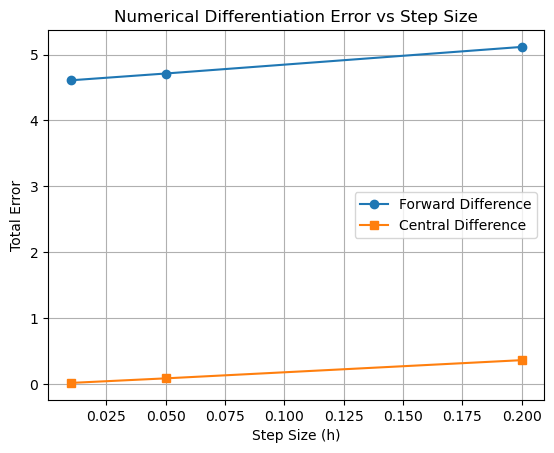

In [7]:
# Sort by step size
sorted_indices = np.argsort(step_sizes)
step_sizes_sorted = [step_sizes[i] for i in sorted_indices]
forward_errors_sorted = [forward_errors[i] for i in sorted_indices]
central_errors_sorted = [central_errors[i] for i in sorted_indices]

plt.plot(step_sizes_sorted, forward_errors_sorted, 'o-', label='Forward Difference')
plt.plot(step_sizes_sorted, central_errors_sorted, 's-', label='Central Difference')


plt.xlabel('Step Size (h)')
plt.ylabel('Total Error')
plt.title('Numerical Differentiation Error vs Step Size')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
print(step_sizes)
print(forward_errors)
print(central_errors)

[0.2, 0.01, 0.05]
[5.115994884969557, 4.609363649952134, 4.712548836153847]
[0.36247186161734457, 0.017025984736949606, 0.08627346700509131]


From the plot and the values of error, we can see that the forward difference approximation method has larger values of error, but the central difference approximation for the first derivative of the function gives a way better approximation, with error values significanly smaller.